## Analysis 

In [1]:
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from geopy.geocoders import Nominatim

In [3]:
data = pd.read_csv('appartments.csv')

Exploring the structure of the CSV...

In [4]:
def parse(row):
    # split the row
    row=row.split(',')
    #print "ROW:",row
    clean= [item for item in row if not item.strip(' ')=='']
    #print "CLEAN:", clean
    res={}
    #print "RES:",res
    values = set(['Tip: ','Cena: ','Povr\xc5\xa1ina: ','Op\xc5\xa1tina: ','Deo: ','Ulica: ','Sprat: ', 
                 'Spratnost: ','Soba: ','Godina izgradnje: '])
    # initialize empty
    for value in values:
        res[value]=''
    
    for item in clean:
        if item in values:
            temp = clean.index(item)
            
            # next one is value
            if item =='Povr\xc5\xa1ina: ':
                res[item] = float(str(clean[temp+1]).split(' ')[0])
                
            elif item =='Cena: ':
                res[item] = float(str(clean[temp+1]).split(' ')[0])
            else:
                res[item] = clean[temp+1]
    return res

In [5]:
def get_features(ser):
    features = set()
    for row in ser:
        try:
            for feature in row.split(','):
                features.add(feature)
        except:
            pass
    return list(features)

In [6]:
def convert_features(feat_series):
    
    # df - features
    result = []
    features = set(['Terasa',
     'Useljivo',
     'Centralno grejanje',
     'Klima',
     'Internet',
     'U izgradnji',
     'Daljinsko grejanje',
     'Telefon',
     'Parking',
     'Podrum',
     'Lift',
     'Uknji\xc5\xbeeno',
     'Novogradnja',
     'Interfon',
     'Kanalizacija',
     'Kablovska']) 
    debug_counter=0
    for row in feat_series:
        res_dict={}
        debug_counter+=1
        try:
            for part in row.split(','):                      
                if part in features:
                    #print "IMA!"
                    res_dict[part] = 1
                else:
                    res_dict[part] = 0
        except AttributeError: # empty string, no splitting
            for feat in features:
                res_dict[feat] = 0
        result.append(res_dict)
        
    return pd.DataFrame(result).fillna(0)

In [7]:
def convert_info(raw):
    # just the raw data
    
    result = [parse(p) for p in raw]
    
    return pd.DataFrame(result)

In [8]:
def full_conversion(csv_file):
    # open the file for csv->pd
    full_content = pd.read_csv(csv_file)
    
    # raw info
    raw_info = full_content.raw_info
    
    # features
    feat = full_content.features
    
    raw_df = convert_info(raw_info)
    feat_df = convert_features(feat)
    
    result = pd.concat([raw_df, feat_df], axis=1)
    
    return result


In [9]:
data = full_conversion('appartments.csv')

In [10]:
data.head()

,Cena:,Deo:,Godina izgradnje:,Opština:,Površina:,Soba:,Sprat:,Spratnost:,Tip:,Ulica:,...,Klima,Lift,Novogradnja,Parking,Podrum,Telefon,Terasa,U izgradnji,Uknjiženo,Useljivo
0,220000,Konjarnik,2015,Zvezdara,172,5,4,6,stan,Vladimira Gortana,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,124000,Neimar,1970,Vračar,105,4,3,10,stan,Sime Igumanova,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,69500,Kalenić pijaca,1970,Vračar,42,1.5,1,,stan,Trnska,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,130000,Lekino brdo,,Voždovac,80,4,2,5,stan,Veselina Masleše,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,135000,Dorćol,,Stari grad,87,3,1,4,stan,Mihizova,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0


### Rename columns + set dtypes

In [11]:
data.columns=['price','part','year','district','area','rooms','floor','tot_floors','type','street','cent_heat','rem_heat','intercom','internet','cable','sewer','aircon','elevator','new','parking','basement','phone','terrace','being_built','papers','enterable']

In [12]:
data.head(10)

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,aircon,elevator,new,parking,basement,phone,terrace,being_built,papers,enterable
0,220000,Konjarnik,2015,Zvezdara,172,5,4,6,stan,Vladimira Gortana,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
1,124000,Neimar,1970,Vračar,105,4,3,10,stan,Sime Igumanova,...,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0
2,69500,Kalenić pijaca,1970,Vračar,42,1.5,1,,stan,Trnska,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,130000,Lekino brdo,,Voždovac,80,4,2,5,stan,Veselina Masleše,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
4,135000,Dorćol,,Stari grad,87,3,1,4,stan,Mihizova,...,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
5,58900,Mirijevo,,Zvezdara,80,2.5,4,4,stan,Mihaila Bulgakova,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
6,65000,Čubura,,Vračar,37,1.5,1,3,stan,Vukice Mitrović,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
7,175000,Centar (Zemun),,Zemun,312,,2,2,stan,Magistratski trg,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
8,165000,Kalenić pijaca,,Vračar,102,3,1,4,stan,Tomaša Ježa,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
9,50000,Banovo brdo,,Čukarica,120,4.5,3,3,stan,Slavonskih brigada,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


In [13]:
data.dtypes

price           object
part            object
year            object
district        object
area            object
rooms           object
floor           object
tot_floors      object
type            object
street          object
cent_heat      float64
rem_heat       float64
intercom       float64
internet       float64
cable          float64
sewer          float64
aircon         float64
elevator       float64
new            float64
parking        float64
basement       float64
phone          float64
terrace        float64
being_built    float64
papers         float64
enterable      float64
dtype: object

In [14]:
data[['price','area','year','rooms']]=data[['price','area','year','rooms']].apply(pd.to_numeric)

In [15]:
data['euro_per_sqm'] = data['price']/data['area']

In [16]:
data.dtypes

price           float64
part             object
year            float64
district         object
area            float64
rooms           float64
floor            object
tot_floors       object
type             object
street           object
cent_heat       float64
rem_heat        float64
intercom        float64
internet        float64
cable           float64
sewer           float64
aircon          float64
elevator        float64
new             float64
parking         float64
basement        float64
phone           float64
terrace         float64
being_built     float64
papers          float64
enterable       float64
euro_per_sqm    float64
dtype: object

### Geocoding with geopy

In [17]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("175 5th Avenue NYC")

In [18]:
location.latitude

40.7410861

In [19]:
def location_string(row):
    string = ''
    if row['street']:
        string =row['street']+', Beograd'
    elif row['part']:
        string =row['part']+', Beograd'
    else:
        string =row['district']+', Beograd'   
    
        
    return string

In [20]:
def get_coordinates(row, sleeptime=1):
    from geopy.geocoders import Nominatim
    from time import sleep
    geolocator = Nominatim()
    try:
        location = geolocator.geocode(row['location_string'])
        sleep(sleeptime)
        print "Trying geolocation"
        lat = location.latitude
        lon = location.longitude
    except:
        print "No result"
        return None
    
    return lat, lon

In [21]:
sample_100 = data.head(100)
sample_100['location_string'] =  sample_100.apply(location_string, axis=1)

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [22]:
sample_100.head()

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,new,parking,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string
0,220000.0,Konjarnik,2015.0,Zvezdara,172.0,5.0,4,6,stan,Vladimira Gortana,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1279.069767,"Vladimira Gortana, Beograd"
1,124000.0,Neimar,1970.0,Vračar,105.0,4.0,3,10,stan,Sime Igumanova,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1180.952381,"Sime Igumanova, Beograd"
2,69500.0,Kalenić pijaca,1970.0,Vračar,42.0,1.5,1,,stan,Trnska,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1654.761905,"Trnska, Beograd"
3,130000.0,Lekino brdo,NaN,Voždovac,80.0,4.0,2,5,stan,Veselina Masleše,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1625.000000,"Veselina Masleše, Beograd"
4,135000.0,Dorćol,NaN,Stari grad,87.0,3.0,1,4,stan,Mihizova,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1551.724138,"Mihizova, Beograd"


In [23]:
sample_100['coordinates'] =  sample_100.apply(get_coordinates, axis=1)

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Tr

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [24]:
import folium

In [25]:
belgrade_map = folium.Map(
    location=[44.797635, 20.4808598],
    zoom_start=12
)

In [26]:
belgrade_map

In [27]:
def color_func(price):
    if price<1000:
        return 'green'
    elif price<1500 and price>=1000:
        return 'blue'
    else:
        return 'red'

In [28]:
sample_100.head(3)
sample_100.columns


Index([u'price', u'part', u'year', u'district', u'area', u'rooms', u'floor',
       u'tot_floors', u'type', u'street', u'cent_heat', u'rem_heat',
       u'intercom', u'internet', u'cable', u'sewer', u'aircon', u'elevator',
       u'new', u'parking', u'basement', u'phone', u'terrace', u'being_built',
       u'papers', u'enterable', u'euro_per_sqm', u'location_string',
       u'coordinates'],
      dtype='object')

In [29]:
sample_100.dropna(inplace=True)

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
sample_100.coordinates.values

array([(44.7863832, 20.5156806), (44.7921517, 20.4744391),
       (44.8027465, 20.4773763), (44.7921517, 20.4744391),
       (44.7689215, 20.61861), (44.8205296, 20.4715858),
       (44.8120805, 20.4615808), (44.8086442, 20.3877758),
       (44.8464243, 20.4093497), (44.7946566, 20.4733132),
       (44.8016779, 20.479757), (44.8004017, 20.4678067),
       (44.8143439, 20.4672757), (44.8063922, 20.4020237),
       (44.3739964, 20.2575945), (44.8135077, 20.4664406),
       (44.7680905, 20.5108319), (44.7954923, 20.4835886),
       (44.7789512, 20.4735233), (44.7792178, 20.4585769),
       (44.4482103, 20.6873929), (44.7747822, 20.4659091),
       (44.8009688, 20.5003143), (44.782107, 20.4700167),
       (44.8073454, 20.4977595), (44.8079751, 20.4796074),
       (44.8100401, 20.5194861), (44.8114541, 20.4543768),
       (44.6546284, 20.1989632), (44.8178131, 20.4568974),
       (44.8009688, 20.5003143), (44.8009688, 20.5003143),
       (44.8009688, 20.5003143), (44.8009688, 20.5003143),
 

In [31]:
belgrade_map = folium.Map(
    location=[44.797635, 20.4808598],
    zoom_start=12
)

for row in sample_100.values:
    
    if row[-1] !=None:
        
        color = color_func(row[-3])     
       
                
        folium.Circle(
            radius = 100,
            location=list(row[-1]),
            popup=str(row[0]),
            color=color                   
            ).add_to(belgrade_map)

In [32]:
belgrade_map

In [33]:
# save

In [34]:
sample_100.isnull().values.any()

False

In [35]:
## Split the coordinates
print sample_100.coordinates.values[0][0],sample_100.coordinates.values[0][1]

44.7863832 20.5156806


In [36]:
def latitude(row):
    return row['coordinates'][0]

In [37]:
sample_100['latitude'] = sample_100.apply(latitude, axis=1)

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [38]:
sample_100.head(5)

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,basement,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates,latitude
0,220000.0,Konjarnik,2015.0,Zvezdara,172.0,5.0,4,6,stan,Vladimira Gortana,...,0.0,1.0,1.0,0.0,0.0,0.0,1279.069767,"Vladimira Gortana, Beograd","(44.7863832, 20.5156806)",44.786383
1,124000.0,Neimar,1970.0,Vračar,105.0,4.0,3,10,stan,Sime Igumanova,...,1.0,1.0,1.0,0.0,1.0,0.0,1180.952381,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152
2,69500.0,Kalenić pijaca,1970.0,Vračar,42.0,1.5,1,,stan,Trnska,...,0.0,1.0,0.0,0.0,1.0,0.0,1654.761905,"Trnska, Beograd","(44.8027465, 20.4773763)",44.802746
10,140000.0,Južni bulevar,2001.0,Vračar,86.0,3.0,2,6,stan,Sime Igumanova,...,1.0,0.0,1.0,0.0,1.0,0.0,1627.906977,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152
11,129900.0,Dorćol,1988.0,Stari grad,78.0,3.5,2,6,stan,Dunavski kej,...,1.0,1.0,1.0,0.0,1.0,0.0,1665.384615,"Dunavski kej, Beograd","(44.7689215, 20.61861)",44.768921


In [39]:
def longitude(row):
    return row['coordinates'][1]

In [40]:
sample_100['longitude'] = sample_100.apply(longitude, axis=1)

/home/freethrow/.virtualenvs/eda/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [41]:
sample_100.head(10)

,price,part,year,district,area,rooms,floor,tot_floors,type,street,...,phone,terrace,being_built,papers,enterable,euro_per_sqm,location_string,coordinates,latitude,longitude
0,220000.0,Konjarnik,2015.0,Zvezdara,172.0,5.0,4,6,stan,Vladimira Gortana,...,1.0,1.0,0.0,0.0,0.0,1279.069767,"Vladimira Gortana, Beograd","(44.7863832, 20.5156806)",44.786383,20.515681
1,124000.0,Neimar,1970.0,Vračar,105.0,4.0,3,10,stan,Sime Igumanova,...,1.0,1.0,0.0,1.0,0.0,1180.952381,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152,20.474439
2,69500.0,Kalenić pijaca,1970.0,Vračar,42.0,1.5,1,,stan,Trnska,...,1.0,0.0,0.0,1.0,0.0,1654.761905,"Trnska, Beograd","(44.8027465, 20.4773763)",44.802746,20.477376
10,140000.0,Južni bulevar,2001.0,Vračar,86.0,3.0,2,6,stan,Sime Igumanova,...,0.0,1.0,0.0,1.0,0.0,1627.906977,"Sime Igumanova, Beograd","(44.7921517, 20.4744391)",44.792152,20.474439
11,129900.0,Dorćol,1988.0,Stari grad,78.0,3.5,2,6,stan,Dunavski kej,...,1.0,1.0,0.0,1.0,0.0,1665.384615,"Dunavski kej, Beograd","(44.7689215, 20.61861)",44.768921,20.618610
12,330000.0,Dorćol,2008.0,Stari grad,157.0,3.0,5,5,stan,Miće Popovića,...,1.0,1.0,0.0,1.0,0.0,2101.910828,"Miće Popovića, Beograd","(44.8205296, 20.4715858)",44.820530,20.471586
15,399000.0,Centar (Stari grad),1934.0,Stari grad,179.0,5.0,1,6,stan,Terazije,...,1.0,0.0,0.0,1.0,0.0,2229.050279,"Terazije, Beograd","(44.8120805, 20.4615808)",44.812081,20.461581
16,199990.0,Blok 63,2015.0,Novi Beograd,125.0,4.0,5,5,stan,Evropska,...,1.0,1.0,0.0,1.0,0.0,1599.920000,"Evropska, Beograd","(44.8086442, 20.3877758)",44.808644,20.387776
17,440000.0,Kalenić pijaca,1954.0,Vračar,187.0,4.5,1,6,stan,Njegoševa,...,1.0,1.0,0.0,1.0,0.0,2352.941176,"Njegoševa, Beograd","(44.8464243, 20.4093497)",44.846424,20.409350
18,244000.0,Neimar,1930.0,Vračar,140.0,4.0,,1,stan,Internacionalnih brigada,...,0.0,1.0,0.0,1.0,0.0,1742.857143,"Internacionalnih brigada, Beograd","(44.7946566, 20.4733132)",44.794657,20.473313


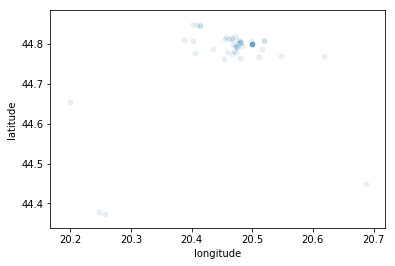

In [42]:
sample_100.plot(kind="scatter", x="longitude", y="latitude", alpha = 0.1)

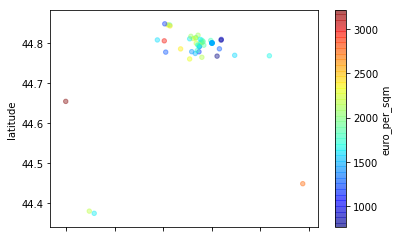

In [43]:
sample_100.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
c="euro_per_sqm", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [44]:
corr_matrix = sample_100.corr()

In [45]:
corr_matrix['euro_per_sqm'].sort_values(ascending = False)

euro_per_sqm    1.000000
price           0.649094
area            0.360565
papers          0.358852
elevator        0.268072
enterable       0.249188
rooms           0.224339
basement        0.220616
cent_heat       0.212634
aircon          0.153793
cable           0.132364
internet        0.126977
sewer           0.078656
new             0.014771
rem_heat        0.006677
intercom       -0.021139
phone          -0.056096
terrace        -0.122277
parking        -0.149566
year           -0.156781
latitude       -0.235898
being_built    -0.244758
longitude      -0.313241
Name: euro_per_sqm, dtype: float64

In [46]:
#sample_100.to_csv('data2.csv')

In [ ]:
# function to process the whole dataset
def process_dataset(df, filename = 'processed.csv'):
    
    # add loc string
    df['location_string'] =  df.apply(location_string, axis=1)
    
    # geocode
    df['coordinates'] = df.apply(get_coordinates, axis=1)
    
    df.dropna(inplace=True)
    
    df.to_csv(filename)
    
    
    
    

In [ ]:
process_dataset(data)

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
No result
No result
No result
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
No result
No result
No result
No result
No result
No result
No result
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
No result
No result
No result
Trying geolocation
No result
No result
No result
Trying geolocation
Trying geol

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geol

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geo

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation


Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geol

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Tr

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geol

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
T

Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
No result
Trying geolocation
No result
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
Trying geolocation
T

In [ ]:
processed = pd.read_csv('processed.csv')